In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
import xgboost
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score


In [2]:
df= pd.read_csv(r"C:\Users\Lenovo\analyst_pkl\data\combBiodata.csv", sep=';')
df.head(5)

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
2,Adinda Azzahra,NaN,NaN,NaN,"9112,046",Tetap,16,DAK,S1,B3,Jakarta,Pelaksana,3,Pelaksana Utama,4,STAF LV. 3
3,Afrilia Fajarwati,NaN,NaN,NaN,221001,Kontrak,1,DAK,S1,B1-MI,Malang,Pelaksana,2,Pelaksana Pemula,2,STAF LV.0
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR


In [3]:
#since that the data needed is only from PPDB, so we can just drop the non-ppdb (the null values)
df1= df.dropna()
df1.isnull().sum()

NAMA                    0
DURATIONS_PERPROJECT    0
TOTAL_PROJECT           0
TOTAL_TIME              0
NIK                     0
STATUS                  0
LAMA_KERJA              0
DIVISI                  0
KUALIFIKASI             0
GOL                     0
LOKASI                  0
TIPE KEAHLIAN           0
KELAS KEAHLIAN          0
LEVEL KEAHLIAN          0
KELAS JABATAN           0
JABATAN                 0
dtype: int64

In [4]:
df1.head()

,NAMA,DURATIONS_PERPROJECT,TOTAL_PROJECT,TOTAL_TIME,NIK,STATUS,LAMA_KERJA,DIVISI,KUALIFIKASI,GOL,LOKASI,TIPE KEAHLIAN,KELAS KEAHLIAN,LEVEL KEAHLIAN,KELAS JABATAN,JABATAN
0,Achmad Fauzi,0.0,2.0,2602.0,350000,Kontrak,3,DSO,S1,B1,Jakarta,Perekayasa,6,Perekayasa Madya,2,STAF LV. 3
1,Adi Pratama,7.0,6.0,8064.0,"8502,013",Tetap,16,DSO,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,1,MANAGER
4,Afrizal Aditya,29.0,3.0,56.0,"9301,057",Tetap,9,DIP,S1,B3,Malang,Perekayasa,2,Pimpinan Pemula,7,STAF LV. 3 / ASS. SUPERVISOR
5,Ahmad Azhar Mashuri,0.0,51.0,3734.0,"8310,019",Tetap,16,DIP,S1,C3,Malang,Perekayasa,2,Pimpinan Muda,5,MANAGER
6,Ahmad Nashruddin,1066.0,11.0,14329.0,190101,Tetap,7,DSO,S1,B3-MI,Malang Madani,Perekayasa,3,Perekayasa Utama,5,STAF LV. 3 / ASS. SUPERVISOR


In [6]:
dfa2= df1.drop(['NAMA', 'NIK', 'TOTAL_TIME', 'KUALIFIKASI', 'TIPE KEAHLIAN', 'JABATAN', 'KELAS KEAHLIAN'], axis=1)
dfa2.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN,KELAS JABATAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya,2
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda,1
4,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula,7
5,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda,5
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama,5


In [9]:
dfa2= dfa2.drop(['KELAS JABATAN'], axis=1)

In [11]:
dfa2.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI,LEVEL KEAHLIAN
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta,Perekayasa Madya
1,7.0,6.0,Tetap,16,DSO,C3,Malang,Pimpinan Muda
4,29.0,3.0,Tetap,9,DIP,B3,Malang,Pimpinan Pemula
5,0.0,51.0,Tetap,16,DIP,C3,Malang,Pimpinan Muda
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani,Perekayasa Utama


In [12]:
#data feature selection
X2= dfa2.drop(['LEVEL KEAHLIAN'], axis=1)
y2= dfa2['LEVEL KEAHLIAN']

In [13]:
X2.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,STATUS,LAMA_KERJA,DIVISI,GOL,LOKASI
0,0.0,2.0,Kontrak,3,DSO,B1,Jakarta
1,7.0,6.0,Tetap,16,DSO,C3,Malang
4,29.0,3.0,Tetap,9,DIP,B3,Malang
5,0.0,51.0,Tetap,16,DIP,C3,Malang
6,1066.0,11.0,Tetap,7,DSO,B3-MI,Malang Madani


In [14]:
#objt(str) to category
X2['STATUS'] = X2['STATUS'].astype('category')
X2['DIVISI'] = X2['DIVISI'].astype('category')
X2['GOL'] = X2['GOL'].astype('category')
X2['LOKASI'] = X2['LOKASI'].astype('category')

In [15]:
X2.dtypes

DURATIONS_PERPROJECT     float64
TOTAL_PROJECT            float64
STATUS                  category
LAMA_KERJA                 int64
DIVISI                  category
GOL                     category
LOKASI                  category
dtype: object

In [17]:
categorical_columns = ['STATUS', 'DIVISI', 'GOL', 'LOKASI']
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(X2[categorical_columns])

In [18]:
# Get the column names for the encoded columns
encoded_col_names = encoder.get_feature_names_out(categorical_columns)

In [19]:
# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names)

In [20]:
# Drop the original categorical columns
X2 = X2.drop(categorical_columns, axis=1)

In [21]:
#reset indices
X2 = X2.reset_index(drop=True)
encoded_df = encoded_df.reset_index(drop=True)

In [22]:
# Concatenate the DataFrame with the encoded columns
X2 = pd.concat([X2, encoded_df], axis=1)

In [23]:
X2

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.0,2.0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.0,6.0,16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,29.0,3.0,9,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,51.0,16,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1066.0,11.0,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,17.0,1.0,11,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,6.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,3.0,9.0,15,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,757.0,2.0,14,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,6.0,9.0,8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
#train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state= 100)

In [25]:
#seperating the numericals only
X2_trainN= X2_train[['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA']]

In [26]:
#X_train normalization
scaler = MinMaxScaler()
X2_trainN_normalized = scaler.fit_transform(X2_trainN)
X2_trainN_normalized = pd.DataFrame(X2_trainN_normalized, columns=['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'])
X2_trainN_normalized = X2_trainN_normalized.round(2)
X2_trainN_normalized.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.04,0.04,0.13
1,0.00,0.16,0.93
2,0.02,0.54,0.20
3,0.00,0.04,1.00
4,0.05,0.08,0.67


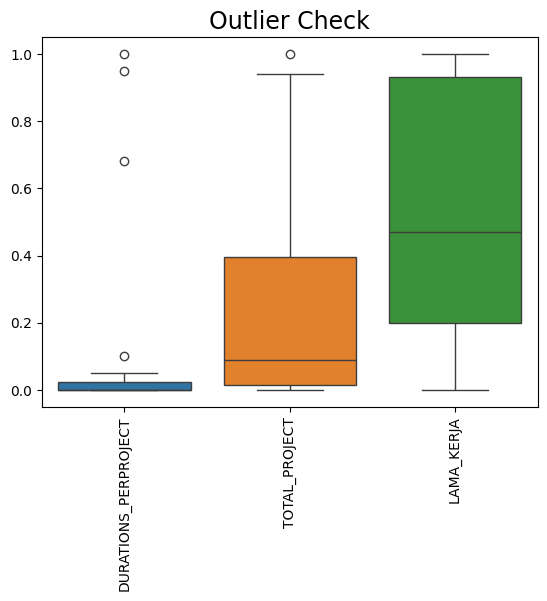

In [27]:
sns.boxplot(X2_trainN_normalized)
plt.title("Outlier Check", size = 17)
plt.xticks(rotation = 90)
plt.show()

In [28]:
q1= X2_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.25)
q3= X2_trainN_normalized['DURATIONS_PERPROJECT'].quantile(0.75)
iqr= q3-q1
q1, q3, iqr

(0.0, 0.0225, 0.0225)

In [29]:
upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)
lower_limit, upper_limit

(-0.011250000000000003, 0.05625)

In [30]:
# find the outliers of df
X2_trainN_normalized.loc[(X2_trainN_normalized['DURATIONS_PERPROJECT'] > upper_limit) | (X2_trainN_normalized['DURATIONS_PERPROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
16,0.95,0.20,0.40
19,1.00,0.00,0.93
30,0.10,0.00,1.00
31,0.68,0.02,0.87


In [31]:
#trimming
X2_train_nD= X2_trainN_normalized.loc[(X2_trainN_normalized['DURATIONS_PERPROJECT'] < upper_limit) & (X2_trainN_normalized['DURATIONS_PERPROJECT'] > lower_limit)]
print('before removing outliers:', len(X2_trainN_normalized))
print('after removing outliers:', len(X2_train_nD))
print('outliers:', len(X2_trainN_normalized) - len(X2_train_nD))

before removing outliers: 32
after removing outliers: 28
outliers: 4


<Axes: ylabel='DURATIONS_PERPROJECT'>

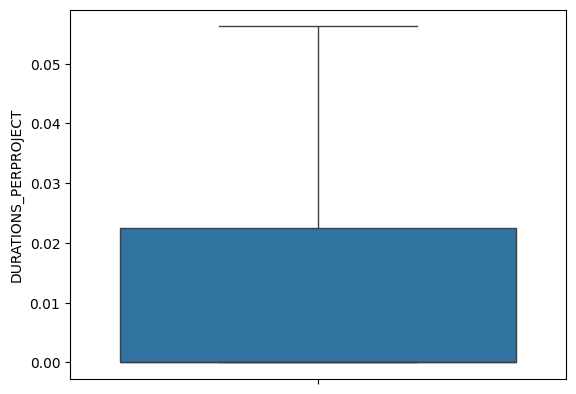

In [32]:
#capping: changing the outlier values to upper/lower limit values
X2_train_nD = X2_trainN_normalized.copy()
X2_train_nD.loc[X2_train_nD['DURATIONS_PERPROJECT'] > upper_limit, 'DURATIONS_PERPROJECT'] = upper_limit
X2_train_nD.loc[X2_train_nD['DURATIONS_PERPROJECT'] < lower_limit, 'DURATIONS_PERPROJECT'] = lower_limit
sns.boxplot(X2_train_nD['DURATIONS_PERPROJECT'])

In [33]:
X2_train_nD= X2_train_nD.drop(['TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)
X2_train_nD.shape

(32, 1)

In [34]:
X2_train_nD.head().round(2)

,DURATIONS_PERPROJECT
0,0.04
1,0.00
2,0.02
3,0.00
4,0.05


In [35]:
#handling outliers w IQR [TOTAL_PROJECT]
q1= X2_trainN_normalized['TOTAL_PROJECT'].quantile(0.25)
q3= X2_trainN_normalized['TOTAL_PROJECT'].quantile(0.75)
iqr= q3-q1

upper_limit= q3 + (1.5 * iqr)
lower_limit= q3 - (1.5 * iqr)

# find the outliers of df
X2_trainN_normalized.loc[(X2_trainN_normalized['TOTAL_PROJECT'] > upper_limit) | (X2_trainN_normalized['TOTAL_PROJECT'] < lower_limit)]

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
29,0.0,1.0,1.0


In [36]:
#trimming
X2_train_nP= X2_trainN_normalized.loc[(X2_trainN_normalized['TOTAL_PROJECT'] < upper_limit) & (X2_trainN_normalized['TOTAL_PROJECT'] > lower_limit)]
print('before removing outliers:', len(X2_trainN_normalized))
print('after removing outliers:', len(X2_train_nD))
print('outliers:', len(X2_trainN_normalized) - len(X2_train_nP))

before removing outliers: 32
after removing outliers: 32
outliers: 1


<Axes: ylabel='TOTAL_PROJECT'>

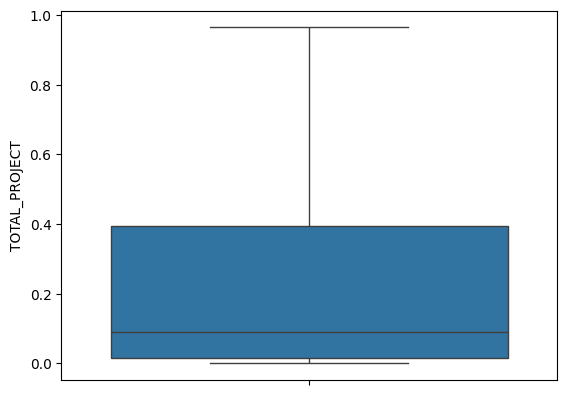

In [37]:
#capping: changing the outlier values to upper/lower limit values
X2_train_nP = X2_trainN_normalized.copy()
X2_train_nP.loc[X2_train_nP['TOTAL_PROJECT'] > upper_limit, 'TOTAL_PROJECT'] = upper_limit
X2_train_nP.loc[X2_train_nP['TOTAL_PROJECT'] < lower_limit, 'TOTAL_PROJECT'] = lower_limit
sns.boxplot(X2_train_nP['TOTAL_PROJECT'])

In [38]:
X2_train_nP= X2_train_nP.drop(['DURATIONS_PERPROJECT', 'LAMA_KERJA'], axis=1)
X2_train_nP.shape

(32, 1)

In [39]:
X2_train_nP.head().round(2)

,TOTAL_PROJECT
0,0.04
1,0.16
2,0.54
3,0.04
4,0.08


In [40]:
X2_trainN_normalized= X2_trainN_normalized.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT'], axis=1)

In [41]:
#reuniting them to X_train
X2_trainNum = pd.concat([X2_train_nD, X2_train_nP, X2_trainN_normalized], axis=1)

In [42]:
X2_trainNum.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA
0,0.04,0.04,0.13
1,0.00,0.16,0.93
2,0.02,0.54,0.20
3,0.00,0.04,1.00
4,0.05,0.08,0.67


In [43]:
X2_train= X2_train.copy()

In [44]:
X2_train= X2_train.drop(['DURATIONS_PERPROJECT', 'TOTAL_PROJECT', 'LAMA_KERJA'], axis=1)

In [45]:
#combining the final X_train

#checking the indices
print(X2_trainNum.index)
print(X2_train.index)

RangeIndex(start=0, stop=32, step=1)
Index([28,  7, 33, 36, 22, 18, 37,  5, 13,  1, 26, 12, 29,  9, 27, 11,  4, 35,
       38, 16, 17, 31, 14, 32,  2, 30, 10, 15, 23,  3, 24,  8],
      dtype='int64')


In [46]:
#reset indices
X2_trainNum = X2_trainNum.reset_index(drop=True)
X2_train = X2_train.reset_index(drop=True)

In [47]:
#concating
X2_train = pd.concat([X2_trainNum, X2_train], axis=1)

In [48]:
X2_train.head()

,DURATIONS_PERPROJECT,TOTAL_PROJECT,LAMA_KERJA,STATUS_Kontrak,STATUS_Tetap,DIVISI_DAK,DIVISI_DBM,DIVISI_DIP,DIVISI_DLA,DIVISI_DMS,...,GOL_B3,GOL_B3-MI,GOL_B4,GOL_C1,GOL_C2,GOL_C3,GOL_F2,LOKASI_Jakarta,LOKASI_Malang,LOKASI_Malang Madani
0,0.04,0.04,0.13,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.00,0.16,0.93,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.02,0.54,0.20,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.00,0.04,1.00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.05,0.08,0.67,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [63]:
y2_train.value_counts()

LEVEL KEAHLIAN
Pimpinan Pemula      8
Perekayasa Utama     8
Perekayasa Madya     4
Pimpinan Muda        3
Perekayasa Muda      2
Perekayasa Magang    2
Pimpinan Utama       1
Pelaksana Madya      1
Pimpinan Madya       1
Pelaksana Utama      1
Pelaksana Pemula     1
Name: count, dtype: int64

In [64]:
y2_test.value_counts()

LEVEL KEAHLIAN
Perekayasa Utama     2
Pimpinan Muda        2
Perekayasa Madya     2
Pimpinan Pemula      1
Perekayasa Magang    1
Name: count, dtype: int64

In [49]:
dt2 = tree.DecisionTreeClassifier()

In [50]:
dt2.fit(X2_train, y2_train)

DecisionTreeClassifier()

In [53]:
y2_preddt = dt2.predict(X2_test)
y2_preddt

array(['Perekayasa Utama', 'Perekayasa Muda', 'Pimpinan Madya',
       'Perekayasa Muda', 'Perekayasa Utama', 'Perekayasa Utama',
       'Pimpinan Muda', 'Perekayasa Utama'], dtype=object)

In [51]:
y2_test

27      Pimpinan Pemula
8      Perekayasa Utama
29        Pimpinan Muda
0      Perekayasa Madya
52    Perekayasa Magang
34     Perekayasa Madya
62        Pimpinan Muda
30     Perekayasa Utama
Name: LEVEL KEAHLIAN, dtype: object

In [55]:
print(classification_report(y2_test, y2_preddt))

                   precision    recall  f1-score   support

 Perekayasa Madya       0.00      0.00      0.00         2
Perekayasa Magang       0.00      0.00      0.00         1
  Perekayasa Muda       0.00      0.00      0.00         0
 Perekayasa Utama       0.25      0.50      0.33         2
   Pimpinan Madya       0.00      0.00      0.00         0
    Pimpinan Muda       1.00      0.50      0.67         2
  Pimpinan Pemula       0.00      0.00      0.00         1

         accuracy                           0.25         8
        macro avg       0.18      0.14      0.14         8
     weighted avg       0.31      0.25      0.25         8



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

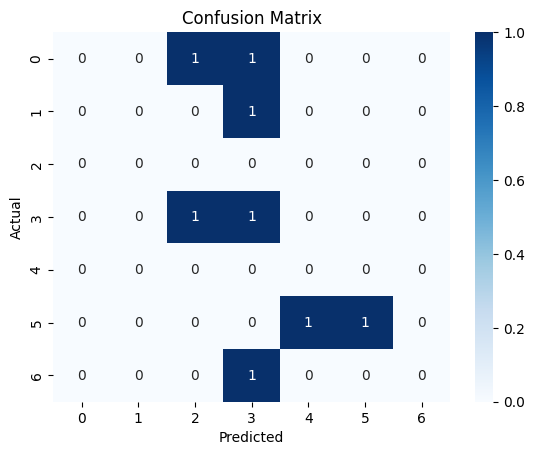

In [56]:
cm2dt= confusion_matrix(y2_test, y2_preddt)
sns.heatmap(cm2dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [57]:
rf2= RandomForestClassifier()

In [58]:
rf2.fit(X2_train, y2_train)

RandomForestClassifier()

In [59]:
y2_predrf = rf2.predict(X2_test)
y2_predrf

array(['Pimpinan Pemula', 'Perekayasa Utama', 'Pimpinan Madya',
       'Perekayasa Utama', 'Perekayasa Muda', 'Perekayasa Madya',
       'Pimpinan Muda', 'Pimpinan Pemula'], dtype=object)

In [61]:
y2_test

27      Pimpinan Pemula
8      Perekayasa Utama
29        Pimpinan Muda
0      Perekayasa Madya
52    Perekayasa Magang
34     Perekayasa Madya
62        Pimpinan Muda
30     Perekayasa Utama
Name: LEVEL KEAHLIAN, dtype: object

In [60]:
print(classification_report(y2_test, y2_predrf))

                   precision    recall  f1-score   support

 Perekayasa Madya       1.00      0.50      0.67         2
Perekayasa Magang       0.00      0.00      0.00         1
  Perekayasa Muda       0.00      0.00      0.00         0
 Perekayasa Utama       0.50      0.50      0.50         2
   Pimpinan Madya       0.00      0.00      0.00         0
    Pimpinan Muda       1.00      0.50      0.67         2
  Pimpinan Pemula       0.50      1.00      0.67         1

         accuracy                           0.50         8
        macro avg       0.43      0.36      0.36         8
     weighted avg       0.69      0.50      0.54         8



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

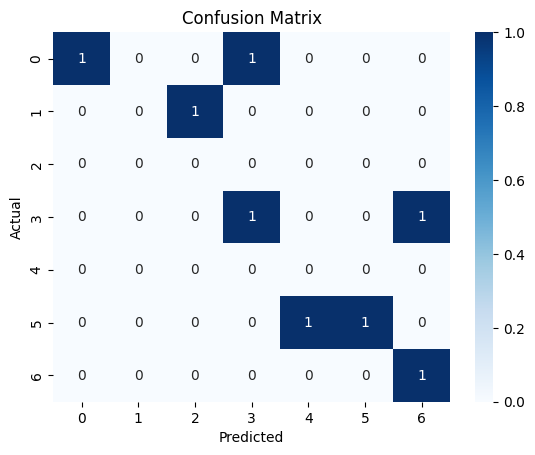

In [62]:
cm2rf= confusion_matrix(y2_test, y2_predrf)
sns.heatmap(cm2rf, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()